## Euclidean and Manhattan Distance Calculations
* Notebook completed by Adam Lang - Springboard Data Science Fellow
* Date: 5/2/2024

In this short mini project you will see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms you'll be using such as Principal Components Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Load Course Numerical Dataset
df = pd.read_csv('data/distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [3]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [6]:
## create distance to ref point (3,3) matrix similar to above
distEuclid2 = np.sqrt((df.Z - 3)**2 + (df.Y - 3)**2)

**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

#### New plot with distEuclid2 ref point 3,3

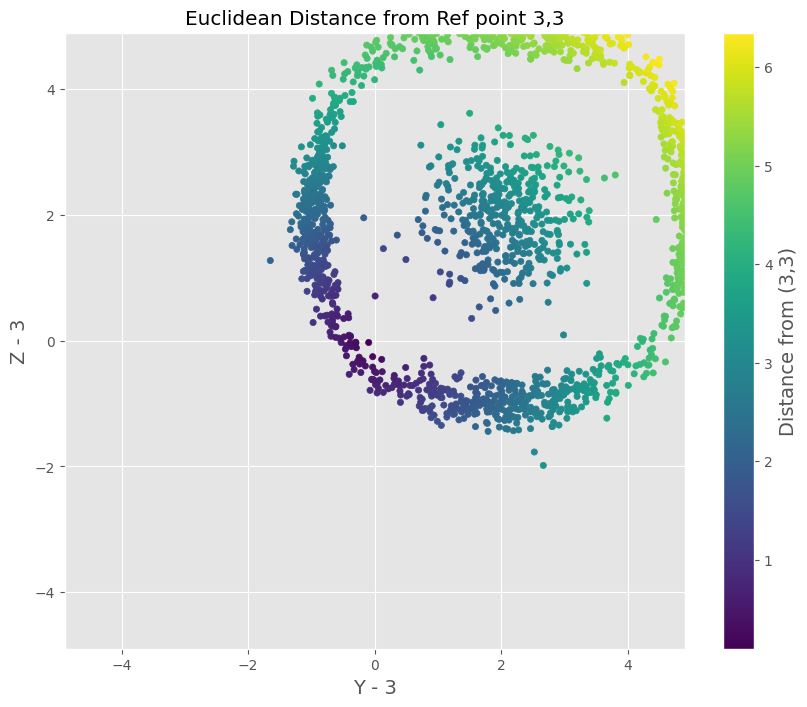

In [29]:
## New plot with the 3,3 ref point

figEuclid = plt.figure(figsize=[10,8])

# I changed the df.y and df.z to df.y-3 and df.z-3
plt.scatter(df.Y - 3, df.Z-3, c=distEuclid2, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 3', size=14)
plt.ylabel('Z - 3', size=14)
plt.title('Euclidean Distance from Ref point 3,3')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

#figEuclid.savefig('plots/Euclidean.png')

Summary: We can see in the plot of the 3,3 ref point euclidean distance that the center points are centered around 2,2. The location of the points is obviously different than for the 5,5 plot as the shortest distance is going to be different.

#### Original Plot of distEuclid point 5,5

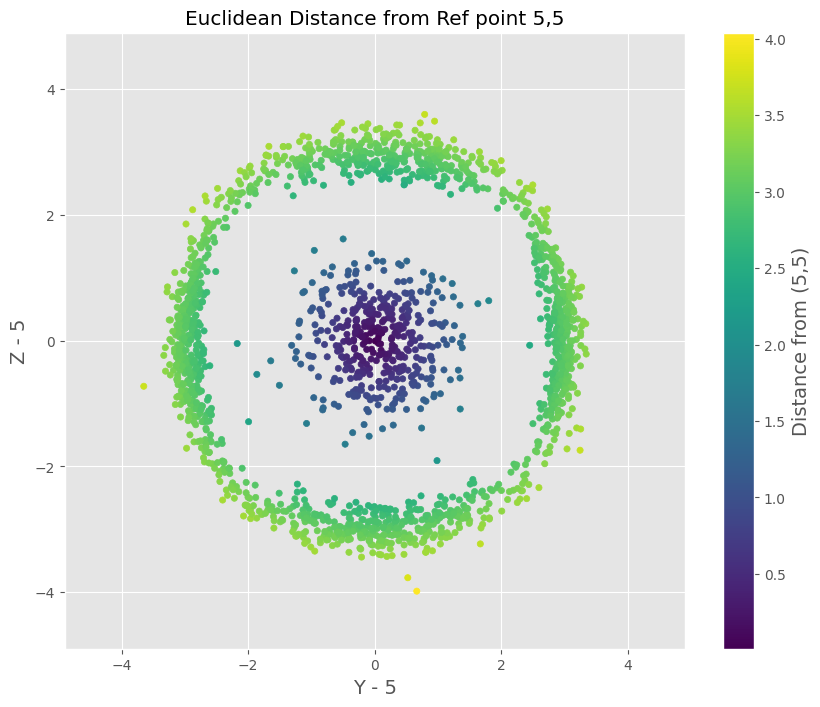

In [28]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance from Ref point 5,5')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

#figEuclid.savefig('plots/Euclidean.png')

Summary: The Euclidean Distance measures the length of the shortest line between 2 points. In the original 5,5 plot above we can see how all the points in the center of the ring are centered around 0,0 as this is the shortest distance between the 2 points.

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coordinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [13]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan = np.abs(df.X - 5) + np.abs(df.Z - 5)

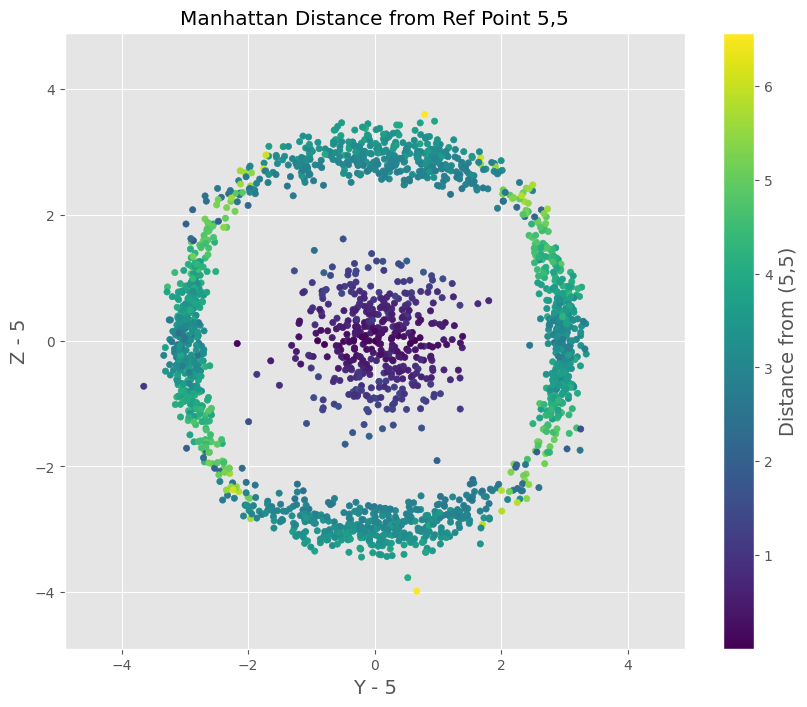

In [31]:
figManhattan = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distManhattan, s=20)
plt.ylim([-4.9,4.9],)
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Manhattan Distance from Ref Point 5,5')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

Summary: Although I wasn't able to draw the dotted lines showing the Manhattan distance, we can see the resulting scatter points form more of a "box" hinting at the Manhattan calculation which mimics walking city blocks to get from point 1 to point 2.

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

In [14]:
# create manhattan distance to ref point (4,4) matrix similar to above
distManhattan2 = np.abs(df.X - 4) + np.abs(df.Z - 4)

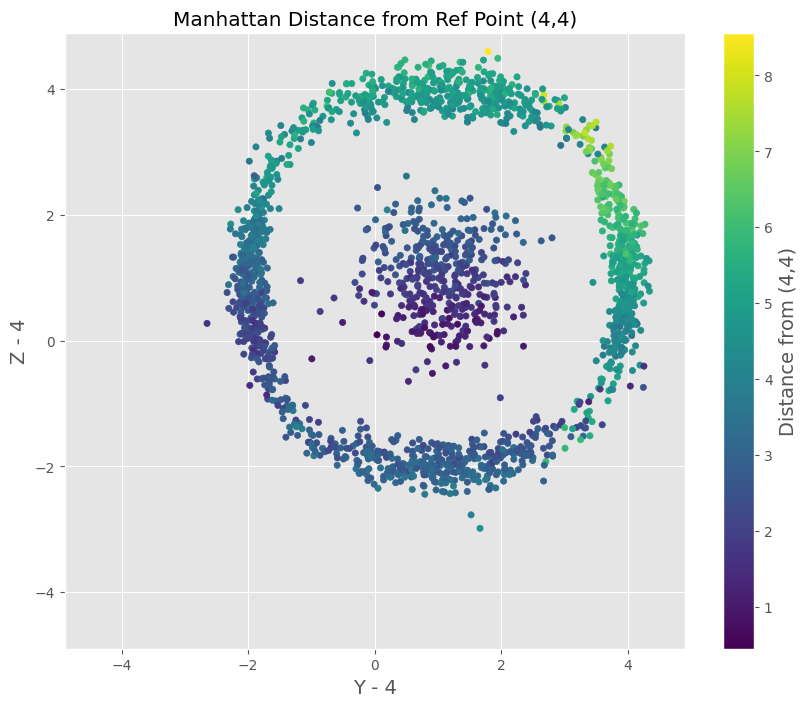

In [26]:
# Plot of Manhattan Distance to ref point 4,4
figManhattan = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 4, df.Z-4, c=distManhattan2, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 4', size=14)
plt.ylabel('Z - 4', size=14)
plt.title('Manhattan Distance from Ref Point (4,4)')
cb = plt.colorbar()
cb.set_label('Distance from (4,4)', size=14)

Summary: Although I wasn't able to draw the dotted lines showing the Manhattan distance, we can see the resulting scatter points form more of a "box" hinting at the Manhattan calculation which mimics walking city blocks to get from point 1 to point 2.

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [15]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

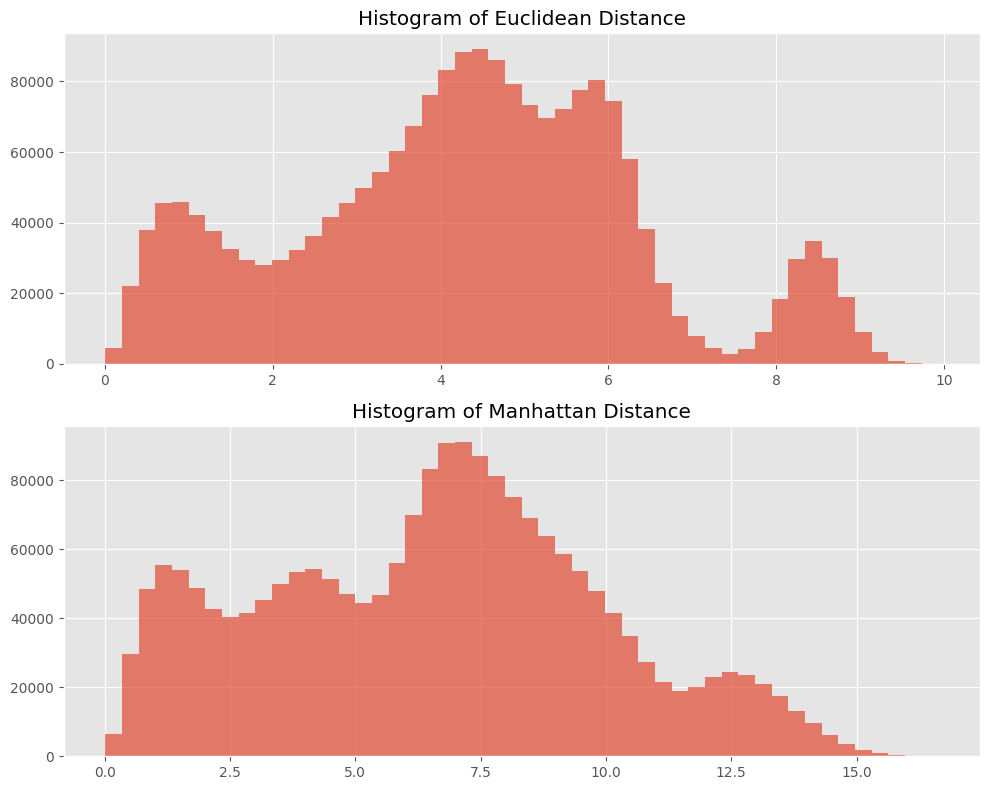

In [32]:
# create a figure with 2 subplots
fig, axs = plt.subplots(2, figsize=[10,8])

# plot Euclidean Distance histogram on the first subplot
axs[0].hist(DistEuclid, bins=50, alpha=0.7, label='Euclidean Distance')
axs[0].set_title('Histogram of Euclidean Distance')

# plot Manhattan Distance histogram on the second subplot
axs[1].hist(DistManhattan, bins=50, alpha=0.7, label='Manhattan Distance')
axs[1].set_title('Histogram of Manhattan Distance')

# display the plots
plt.tight_layout()
plt.show()

Summary of histograms:
* We can see the difference between the Euclidean Distance and the Manhattan distance metrics demonstrated by the histograms.
* The Manhattan distance covers a broader range of points from 0.0 to 15.0 which is the sum of the absolute differences between all points in a dimension thus mimicing a "taxi cab" or "City block" distance.
* The Euclidean distance being the shortest distance between 2 points has a lower range of points from 0 to 10 with most centered around 4 to 6.